Cargar Datos


In [21]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


# Conectar a la base de datos SQLite
conn = sqlite3.connect('Mall_Customer.db')

data = pd.read_sql("SELECT * FROM clientes", conn)


1.Agrupacion de edades y sus ingresos prediccion para 2025

Age Category
Adulto          6212.152492
Adulto Mayor    2530.585894
Joven           3974.861615
Name: Predicted Annual Income 2025 (k$), dtype: float64


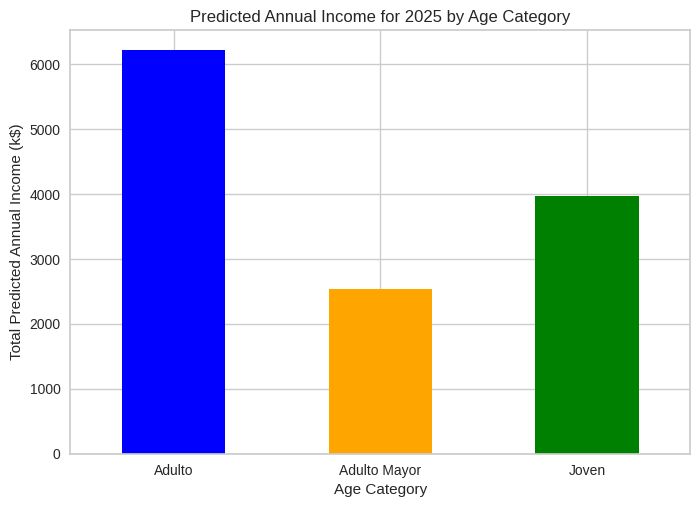

In [22]:
# Preprocesar los datos
data_preprocessed = data.drop('CustomerID', axis=1)
data_preprocessed['Gender'] = data_preprocessed['Gender'].map({'Male': 0, 'Female': 1})

#Segmentación por Edad

def age_category(age):
    if 18 <= age <= 30:
        return 'Joven'
    elif 31 <= age <= 50:
        return 'Adulto'
    else:
        return 'Adulto Mayor'

data_preprocessed['Age Category'] = data_preprocessed['Age'].apply(age_category)

#PREDICCION INGRESOS ANUALES 2025

from sklearn.linear_model import LinearRegression

# Filtrar los datos por las columnas relevantes
features = data_preprocessed[['Age', 'Gender', 'Spending_Score']]
target = data_preprocessed['Annual_Income']

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(features, target)

# Hacer predicciones para el año 2025
data_preprocessed['Predicted Annual Income 2025 (k$)'] = model.predict(features) * (1 + 0.05)  # Asumimos un incremento del 5%

# Calcular el ingreso total anual para cada categoría de edad
total_income_2025 = data_preprocessed.groupby('Age Category')['Predicted Annual Income 2025 (k$)'].sum()

print(total_income_2025)

# Calcular el ingreso total anual para cada categoría de edad
total_income_2025 = data_preprocessed.groupby('Age Category')['Predicted Annual Income 2025 (k$)'].sum()

# Graficar el resultado
total_income_2025.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Predicted Annual Income for 2025 by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Predicted Annual Income (k$)')
plt.xticks(rotation=0)
plt.show()

2. Cual genero es que tiene más puntuación de gasto actualmente y que se espera también para 2025

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64
        Spending_Score  Predicted Spending Score 2025
Male         48.511364                      50.936932
Female       51.526786                      54.103125


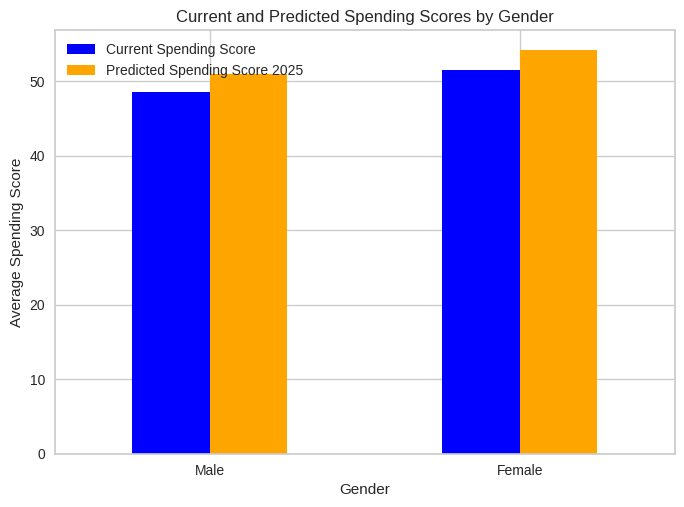

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


# Preprocesar los datos: Convertir Gender a valores numéricos
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Filtrar los datos por las columnas relevantes para la predicción del Spending Score
features = data[['Age', 'Gender', 'Annual_Income']]
target = data['Spending_Score']

# Verificar si hay valores faltantes
print(data.isnull().sum())

# Manejar valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(features_imputed, target)

# Hacer predicciones para el Spending Score en el año 2025
predicted_spending_score_2025 = model.predict(features_imputed) * (1 + 0.05)  # Asumimos un incremento del 5%

# Añadir las predicciones al dataframe original
data['Predicted Spending Score 2025'] = predicted_spending_score_2025

# Calcular el promedio de Spending Score actual y predicho por género
average_scores = data.groupby('Gender')[['Spending_Score', 'Predicted Spending Score 2025']].mean()

# Renombrar los índices para que sean más descriptivos
average_scores.index = ['Male' if i == 0 else 'Female' for i in average_scores.index]

# Verificar el DataFrame resultante
print(average_scores)

# Graficar los resultados
average_scores.plot(kind='bar', color=['blue', 'orange'])
plt.title('Current and Predicted Spending Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.xticks(rotation=0)
plt.legend(['Current Spending Score', 'Predicted Spending Score 2025'])
plt.show()


